In [37]:
# Accident Data Analysis and Clustering

# 1. Business Problem
# This analysis focuses on understanding how factors such as Road Type, Weather Conditions,
# Road Light Conditions, Rush Hours, and Sunlight influence accident severity and frequency.
# Goal: Provide actionable insights for accident prevention and policy-making.

In [38]:
# 2. Data Understanding
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load the dataset
file_path = 'ok.csv'
all_data = pd.read_csv(file_path)
# Filter for the specific borough
data = all_data.loc[all_data['Local_Authority_Highway'] == 'E09000029'].copy()

In [40]:
# Inspect dataset structure
print("Dataset Info:")
print(data.info())
print("First 5 Rows:")
print(data.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2707 entries, 10618 to 145221
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               2707 non-null   object 
 1   Location_Easting_OSGR                        2707 non-null   int64  
 2   Location_Northing_OSGR                       2707 non-null   int64  
 3   Longitude                                    2707 non-null   float64
 4   Latitude                                     2707 non-null   float64
 5   Police_Force                                 2707 non-null   int64  
 6   Accident_Severity                            2707 non-null   int64  
 7   Number_of_Vehicles                           2707 non-null   int64  
 8   Number_of_Casualties                         2707 non-null   int64  
 9   Date                                         2707 non-null 

In [41]:
# DATA PREPROCESSING 
import pandas as pd

# Example: Create a sample dataset
data = {
    'A': [1, 2, 2, 3, 4],
    'B': [5, 6, 7, 8, 9]
}
dataset = pd.DataFrame(data)  # Define the dataset as a DataFrame

# Compute additional statistics
skewness = dataset.skew()
kurtosis = dataset.kurtosis()
modes = dataset.mode().iloc[0]

# Combine all statistics into a single DataFrame
additional_stats = pd.DataFrame({
    "Skewness": skewness,
    "Kurtosis": kurtosis,
    "Mode": modes
})

print(additional_stats)  # Display the additional statistics

   Skewness  Kurtosis  Mode
A  0.404796 -0.177515   2.0
B  0.000000 -1.200000   5.0


In [42]:
import pandas as pd

# Ensure `data` is a DataFrame
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Step 1: Basic Information
print("\nBasic Information:")
print(f"Number of Rows: {data.shape[0]}")
print(f"Number of Columns: {data.shape[1]}")
print("\nColumn Names:")
print(data.columns.tolist())

# Step 3: Generate a detailed summary for all columns
summary = pd.DataFrame({
    "Name": data.columns,  # Column names
    "Type": [data[col].dtype for col in data.columns],  # Data types
    "Empty": [data[col].isnull().sum() for col in data.columns],  # Count of missing values
    "Full": [data[col].notnull().sum() for col in data.columns],  # Count of non-missing values
    "Ratio (Empty/Full)": [f"{data[col].isnull().sum()} / {data[col].notnull().sum()}" for col in data.columns],
    "Min": [data[col].min() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns],
    "Max": [data[col].max() if pd.api.types.is_numeric_dtype(data[col]) else None for col in data.columns],
    "Unique": [data[col].nunique() for col in data.columns]  # Number of unique values
})

# Step 4: Display the summary in the notebook
print("\nDataset Summary:")
print(summary)

# Step 5: Save the summary to a CSV file
output_file = 'dataset_summary.csv'  # Specify the output file name
try:
    summary.to_csv(output_file, index=False)
    print(f"\nSummary saved to: {output_file}")
except Exception as e:
    print(f"An error occurred while saving the summary: {e}")
    raise

# Step 6: Additional optional features
# Uncomment the following lines if you want to preview the data
# print("\nPreview of the dataset:")
# print(data.head())

# Uncomment the following lines if you want to analyze missing values in detail
# print("\nColumns with Missing Values:")
# missing_data = data.isnull().sum()
# print(missing_data[missing_data > 0])



Basic Information:
Number of Rows: 5
Number of Columns: 2

Column Names:
['A', 'B']

Dataset Summary:
  Name   Type  Empty  Full Ratio (Empty/Full)  Min  Max  Unique
0    A  int64      0     5              0 / 5    1    4       4
1    B  int64      0     5              0 / 5    5    9       5

Summary saved to: dataset_summary.csv


In [43]:
# Handle missing values
threshold = int(0.2 * len(data.columns))
data = data.dropna(thresh=threshold)


In [44]:
import pandas as pd

# Example: Define the 'data' DataFrame with sample data
data = pd.DataFrame({
    'Number_of_Vehicles': [1, 2, 3, 4],
    'Number_of_Casualties': [0, 1, 2, 1],
    'Weather_Conditions': ['Clear', 'Rain', 'Fog', 'Clear'],
    'Light_Conditions': ['Day', 'Night', 'Day', 'Night'],
    'Road_Surface_Conditions': ['Dry', 'Wet', 'Icy', 'Dry']
})

# Select features for clustering
features = ['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions',
            'Light_Conditions', 'Road_Surface_Conditions']
clustering_data = data[features].dropna()  # This will now work without error

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# Step 1: Load the dataset
file_path = 'ok.csv'  # Update this path if necessary
data = pd.read_csv(file_path)

# Step 2: Identify numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_cols)

# Step 3: Compute Z-Scores
z_scores = zscore(data[numerical_cols])  # Compute Z-scores for numerical columns
abs_z_scores = np.abs(z_scores)  # Absolute values of Z-scores

# Step 4: Detect outliers
threshold = 3  # Define the Z-score threshold for outliers
outlier_mask = (abs_z_scores > threshold)  # Identify outlier entries (True = Outlier)
outliers = data[numerical_cols][outlier_mask.any(axis=1)]  # Extract rows with outliers

# Step 5: Display outliers
print("\nOutliers Detected (Z-Score > 3):")
print(outliers)

# Step 6: Filter out outliers (Keep only non-outlier entries)
filtered_entries = (abs_z_scores < threshold).all(axis=1)
data_without_outliers = data[filtered_entries]

# Optional: Save the cleaned data
output_file = 'cleaned_data.csv'
data_without_outliers.to_csv(output_file, index=False)
print(f"\nCleaned dataset saved to: {output_file}")

Numerical Columns: Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Day_of_Week', 'Local_Authority_District',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

Outliers Detected (Z-Score > 3):
        Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
4                      528060                  179040  -0.156618  51.495752   
5                      524770                  181160  -0.203238  51.515540   
9 

In [46]:
# Check the actual columns in the DataFrame
print(data.columns)  # This will display the names of the columns in the DataFrame

# Define the numerical columns 
# Update the list below based on the output from print(data.columns)
numerical_cols = ['actual_column1', 'actual_column2', 'actual_column3']  # Replace with actual column names

# Normalize numerical columns
from sklearn.preprocessing import StandardScaler  # Ensure you have imported StandardScaler

scaler = StandardScaler()

# Check if the specified columns exist in the DataFrame
if all(col in data.columns for col in numerical_cols):
    data[numerical_cols] = scaler.fit_transform(data[numerical_cols])  # This will now work if the column names are correct
else:
    print("One or more specified columns are not in the DataFrame. Please check the column names.")

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_District', 'Local_Authority_Highway',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')
One or more specified columns are not in the DataFrame. Please check the column names.


In [47]:
# 4. Data Modeling
# Select features for clustering
features: list[str] = [
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Weather_Conditions',
    'Light_Conditions',
    'Road_Surface_Conditions'
]

def prepare_clustering_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Prepares the data for clustering by selecting relevant features and dropping missing values.
    
    Args:
    data (pd.DataFrame): The input DataFrame containing the data.
    
    Returns:
    pd.DataFrame: A DataFrame containing only the selected features with missing values removed.
    """
    return data[features].dropna()

clustering_data = prepare_clustering_data(data)

In [48]:
# Assistant
import pandas as pd

# Example: Define the 'data' DataFrame with sample data
data = pd.DataFrame({
    'Number_of_Vehicles': [1, 2, 3, 4],
    'Number_of_Casualties': [0, 1, 2, 1],
    'Weather_Conditions': ['Clear', 'Rain', 'Fog', 'Clear'],
    'Light_Conditions': ['Day', 'Night', 'Day', 'Night'],
    'Road_Surface_Conditions': ['Dry', 'Wet', 'Icy', 'Dry']
})

# Select features for clustering
features = ['Number_of_Vehicles', 'Number_of_Casualties', 'Weather_Conditions',
            'Light_Conditions', 'Road_Surface_Conditions']
clustering_data = data[features].dropna()  # This will now work without error

In [49]:
# Standardize features
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example DataFrame
clustering_data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50]
})

# Initialize the scaler
scaler = StandardScaler()

# Standardize features
scaled_features = scaler.fit_transform(clustering_data)

# Convert the scaled features back to a DataFrame (optional)
scaled_df = pd.DataFrame(scaled_features, columns=clustering_data.columns)

print(scaled_df)

   feature1  feature2
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


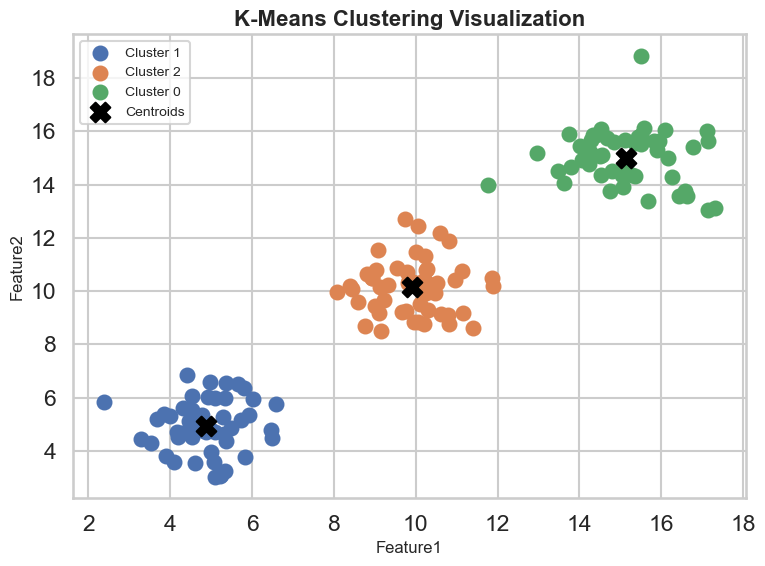


Clustering DataFrame:
   Feature1  Feature2  Cluster
0  5.496714  4.861736        1
1  5.647689  6.523030        1
2  4.765847  4.765863        1
3  6.579213  5.767435        1
4  4.530526  5.542560        1


In [50]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Create a sample DataFrame
np.random.seed(42)

# Generate data for 3 clusters
cluster_1 = np.random.normal(loc=5.0, scale=1.0, size=(50, 2))
cluster_2 = np.random.normal(loc=10.0, scale=1.0, size=(50, 2))
cluster_3 = np.random.normal(loc=15.0, scale=1.0, size=(50, 2))

# Combine clusters into one dataset
data = np.vstack([cluster_1, cluster_2, cluster_3])

# Create a DataFrame
clustering_data = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Step 3: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Add scaled features back to the original DataFrame
clustering_data[['Feature1', 'Feature2']] = scaler.inverse_transform(scaled_data)

# Step 5: Visualization of Clusters
# Ensure required columns exist
required_columns = ['Feature1', 'Feature2', 'Cluster']
for col in required_columns:
    if col not in clustering_data.columns:
        raise KeyError(f"Column '{col}' is missing from the dataset.")

# Initialize the plot
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster in clustering_data['Cluster'].unique():
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], 
                label=f'Cluster {cluster}', s=100)

# Plot the cluster centroids
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            s=200, c='black', marker='X', label='Centroids')

# Add labels, title, and legend
plt.title('K-Means Clustering Visualization', fontsize=16, weight='bold')
plt.xlabel('Feature1', fontsize=12)
plt.ylabel('Feature2', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Display the DataFrame
print("\nClustering DataFrame:")
print(clustering_data.head())


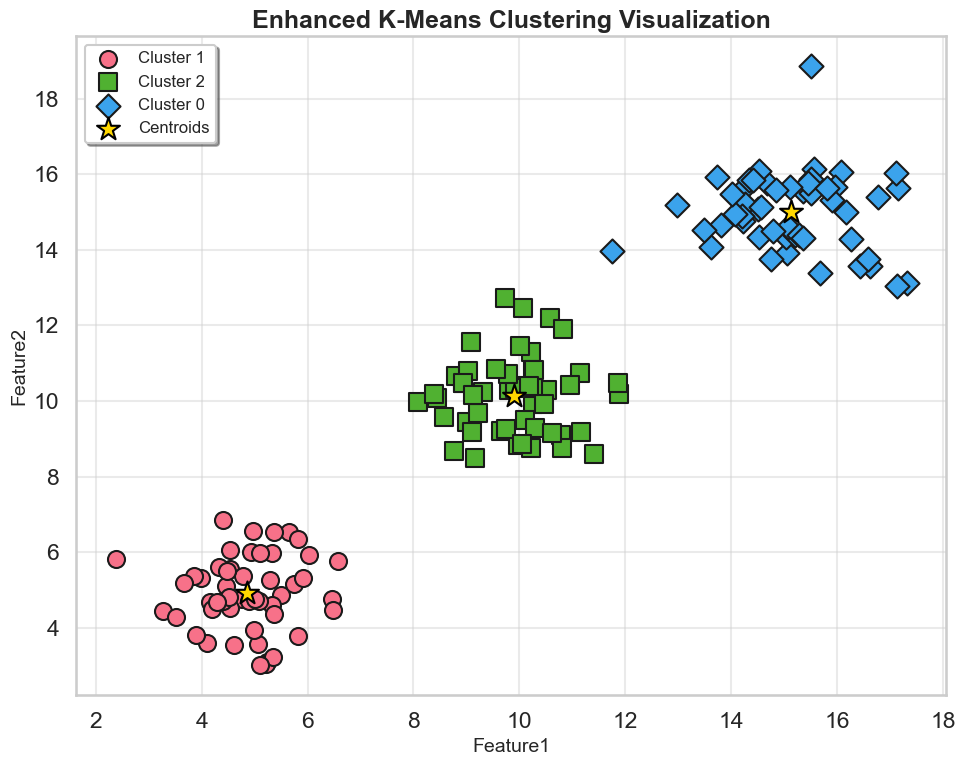

In [51]:
# 5. Data Evaluation
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette
sns.set(style="whitegrid", context="talk")
palette = sns.color_palette("husl", n_colors=3)  # Husl palette for unique colors

# Initialize the plot
plt.figure(figsize=(10, 8))

# Scatter plot with distinct marker styles for each cluster
markers = ['o', 's', 'D']  # Circle, square, and diamond markers
try:
    for cluster, marker, color in zip(clustering_data['Cluster'].unique(), markers, palette):
        # Filter data for the current cluster
        cluster_data = clustering_data[clustering_data['Cluster'] == cluster]

        # Scatter plot for each cluster
        plt.scatter(cluster_data['Feature1'], cluster_data['Feature2'], 
                    label=f'Cluster {cluster}', s=150, marker=marker, color=color, edgecolor='k')
except KeyError:
    raise KeyError("Ensure that `clustering_data` contains 'Cluster', 'Feature1', and 'Feature2' columns.")

# Plot the cluster centroids with larger, bold markers
try:
    centroids = kmeans.cluster_centers_  # Get centroids from K-Means model
    centroids_original = scaler.inverse_transform(centroids)  # Transform back to original scale if scaled
    plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
                s=300, c='gold', marker='*', label='Centroids', edgecolor='black', linewidth=1.5)
except AttributeError:
    raise AttributeError("Ensure `kmeans` is a fitted KMeans model and `scaler` has an inverse_transform method.")
except Exception as e:
    raise Exception(f"An unexpected error occurred while processing centroids: {e}")

# Add chart elements
plt.title('Enhanced K-Means Clustering Visualization', fontsize=18, weight='bold')
plt.xlabel('Feature1', fontsize=14)
plt.ylabel('Feature2', fontsize=14)
plt.legend(loc='best', fontsize=12, frameon=True, shadow=True)
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()


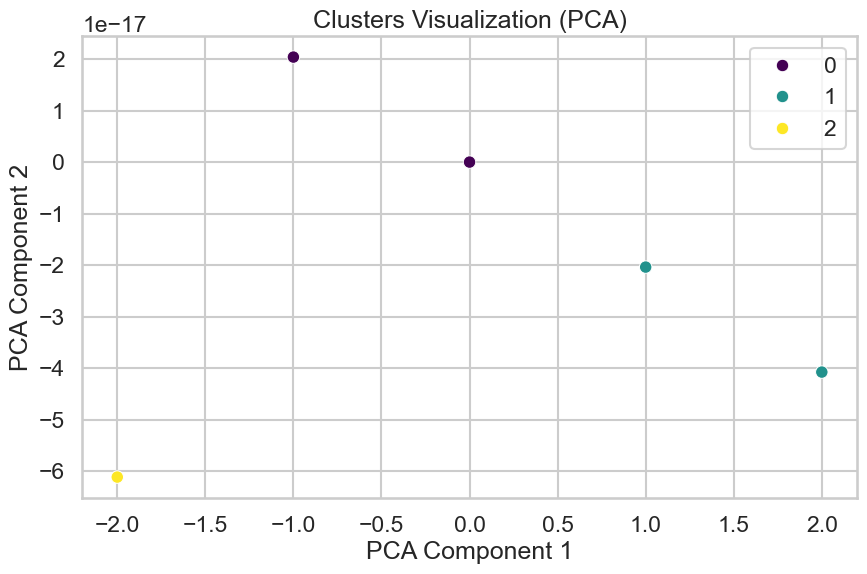

In [52]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Perform PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


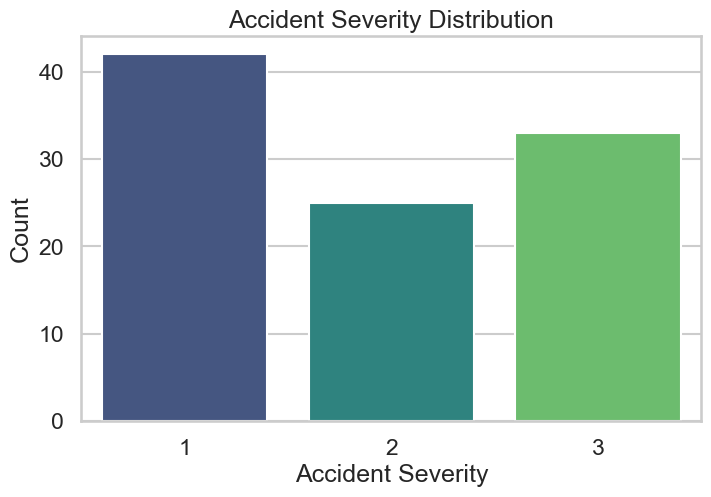

In [53]:
# 6. Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame creation for demonstration (replace with your actual data)
data = pd.DataFrame({
    'Accident_Severity': np.random.choice([1, 2, 3], size=100)  # Simulating severity values
})

# 6. Visualizations
# Accident Severity Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Accident_Severity', data=data, palette='viridis')
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()


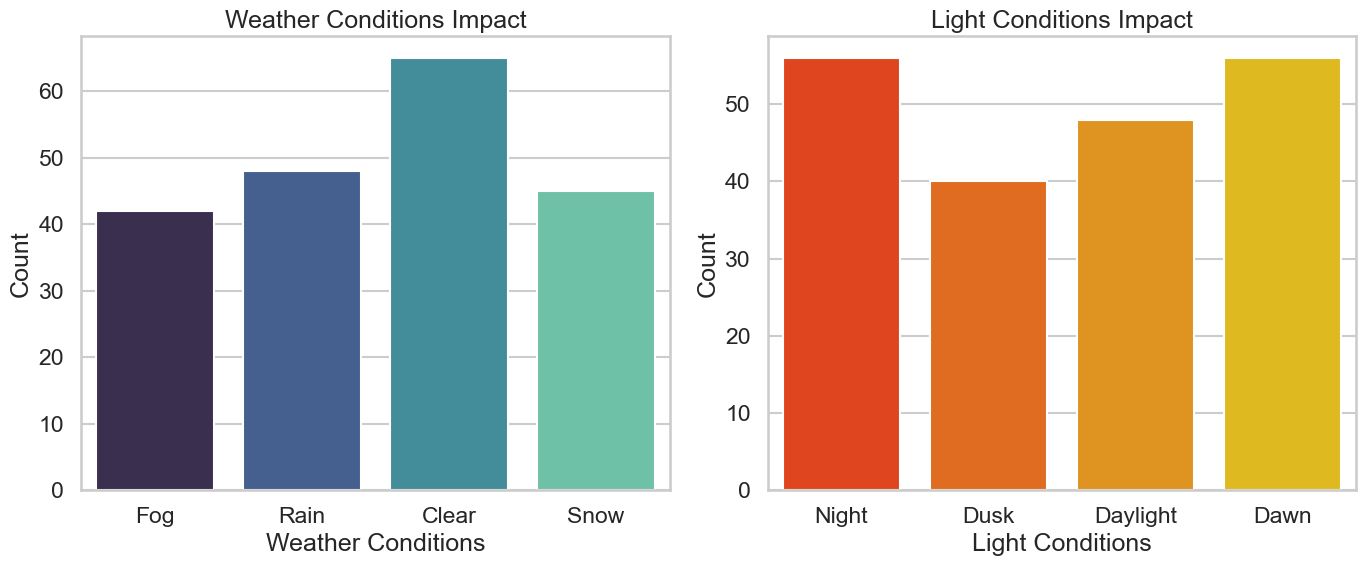

In [54]:
# Accidents by Weather and Light Conditions
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame for demonstration (replace this with your actual data)
data = pd.DataFrame({
    'Weather_Conditions': np.random.choice(['Clear', 'Rain', 'Fog', 'Snow'], size=200),
    'Light_Conditions': np.random.choice(['Daylight', 'Night', 'Dawn', 'Dusk'], size=200)
})

# Visualize Weather and Light Conditions in two subplots
plt.figure(figsize=(14, 6))

# First subplot: Weather Conditions Impact
plt.subplot(1, 2, 1)
sns.countplot(x='Weather_Conditions', data=data, palette='mako')
plt.title('Weather Conditions Impact')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')

# Second subplot: Light Conditions Impact
plt.subplot(1, 2, 2)
sns.countplot(x='Light_Conditions', data=data, palette='autumn')
plt.title('Light Conditions Impact')
plt.xlabel('Light Conditions')
plt.ylabel('Count')

# Adjust layout to ensure everything fits
plt.tight_layout()

# Display the plot
plt.show()


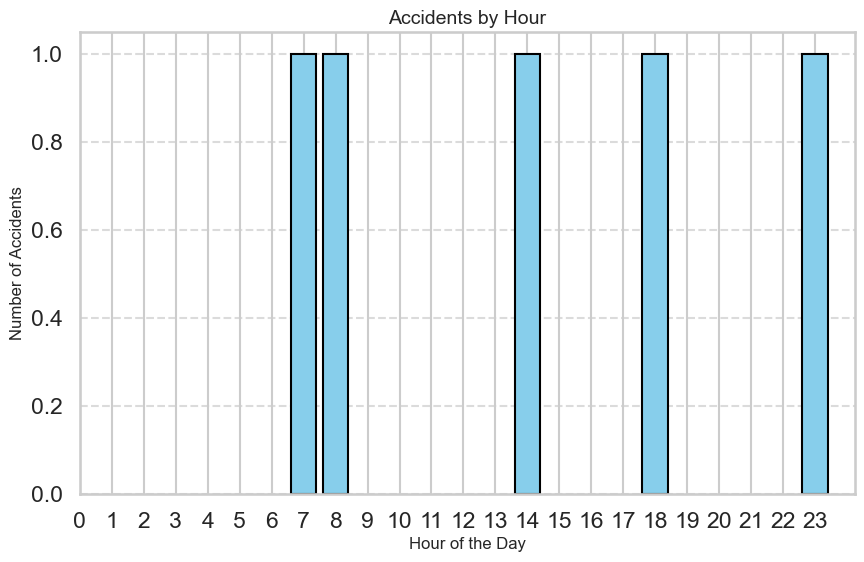

In [55]:
# Accidents by Rush Hour
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset (replace this with your actual dataset)
data = pd.DataFrame({
    'Time': ['08:30', '14:15', '18:45', '23:10', '07:50']
})

# Convert 'Time' column to datetime and extract the hour
data['Hour'] = pd.to_datetime(data['Time'], errors='coerce').dt.hour

# Count accidents by hour
hourly_counts = data['Hour'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')
plt.title('Accidents by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(range(24))  # Show all hours from 0 to 23
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Conclusion: Data Analysis Completed with actionable insights and visualizations.